# Bernstein-Vazirani Algorithm

## In this jupyter notebook I'd like to show that quantum computers are able to solve a problem much faster than a classical computer.
### What's the problem?
Imagine you're having a box with a hidden binary number inside. How many tries you'd have to take to find out that hidden number with a classical computer? One approach for classical computers is to try every position of this binary number and check if it's a 1 (by applying AND gates repeatedly). You see, the problem here is that we need to make n attempts to find the hidden number n, the complexity is O(n). So for a 5 digit number, it takes 5 attempts. For 100 digit number it takes 100 attempts.

A quantum computer only needs one, single attempt by using quantum phenomena and therefore reduces the complexity to O(1).

For a mathematical description of the problem and for an alternative implementation in Qiskit check out Qiskit Textbook: https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html

In [ ]:
from qiskit import *

In [ ]:
hidden_message = "101010011" # pass any binary number you like

In [4]:
def bernstein_vazirani(string: str) -> QuantumCircuit:
    
    # Save the length of string
    string_length: int = len(string)
    
    # Create quantum circuit instance
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize input qubits, apply Hadamard gate to switch them to superposition
    for i in range(string_length):
        qc.h(i)
    
    # Output qubit to |->
    qc.x(string_length)
    qc.h(string_length)
    
    qc.barrier()
    
    # Apply an oracle for the given string
    string = string[::-1] # In Qiskit, numbers are assigned to the bits in a string from right to left
    
    for q in range(string_length):
        if string[q] != "0":
            qc.cx(q, string_length) # Create entanglement to output qubit when bit equals 1
        
    # Apply Hadamard gates after querying the oracle
    for i in range(string_length):
        qc.h(i)
        
    qc.barrier()
    
    # Measurement
    qc.measure(range(string_length), range(string_length))
    
    return qc

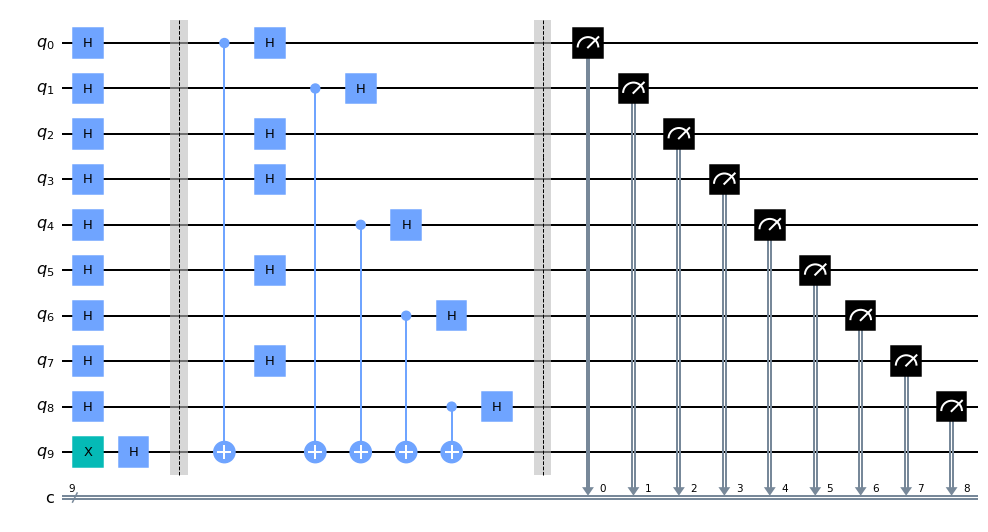

In [5]:
qc = bernstein_vazirani(hidden_message)
%matplotlib inline
qc.draw(output="mpl")

In [6]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'101010011': 1}
